In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('train.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[df.Age == 0.42]

In [ ]:
df[df.Age< 1]

In [ ]:
df[df.Age == 80]

In [ ]:
df[(df.Age > 25)].Survived.value_counts()

In [ ]:
df.Sex

In [ ]:
df.Survived

In [ ]:
df[(df.Sex=='female')].Survived.value_counts()

In [ ]:
df[(df.Sex=='male')].Survived.value_counts()

In [ ]:
df[(df.Pclass==1)].Survived.value_counts()

In [ ]:
df[(df.Pclass==1)].Survived.value_counts()[1]/df[df.Pclass == 1].Survived.value_counts().sum()

In [ ]:
df[(df.Pclass==2)].Survived.value_counts()[1]/df[df.Pclass == 2].Survived.value_counts().sum()

In [ ]:
df[(df.Pclass==3)].Survived.value_counts()[1]/df[df.Pclass == 3].Survived.value_counts().sum()

In [ ]:
df[(df.Pclass==3) & (df.Age < 15)].Survived.value_counts()

In [ ]:
df.Survived

In [ ]:
df.Survived.value_counts()

In [ ]:
df.Age.mean()

In [ ]:
df.Age.fillna(29, inplace=True)

In [ ]:
df.info()

In [ ]:
df.drop('Cabin',axis=1)

In [ ]:
model= LogisticRegression()

In [ ]:
new_sex=pd.get_dummies(df,columns=['Sex','Embarked'])

In [ ]:
new_sex.Age.fillna(29, inplace=True)

In [ ]:
new_sex

In [ ]:
x=new_sex[['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]

In [ ]:
y=df[['Survived']]

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(x,y)

In [ ]:
model.score(x,y)

In [ ]:
model.coef_

In [ ]:
x.columns

In [ ]:
x.corr()

In [ ]:
sns.heatmap(x.corr())

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
new_sex.Fare.mean()

In [ ]:
plt.boxplot(new_sex.Fare)

In [ ]:
new_sex[new_sex.Ticket == 'LINE']

In [ ]:
new_sex[new_sex.Pclass == 1]

In [ ]:
new_sex[new_sex.Pclass == 1].describe()

In [ ]:
sns.pairplot(new_sex)

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = MinMaxScaler(feature_range = (0,1))
rescale = scaler.fit_transform(x[['Fare']])

In [47]:
pd.DataFrame(rescale)

,0
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


In [48]:
!pip install pandas-profiling

In [49]:
!pip install sweetviz

In [50]:
import pandas_profiling as pp

C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Acer\AppData\Local\Temp\ipykernel_7192\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [51]:
EDA_report = pp.ProfileReport(new_sex)
EDA_report.to_file(output_file = 'report_titanic.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 68.26it/s]


In [52]:
import sweetviz as sv

In [53]:
sweet_report = sv.analyze(new_sex)
sweet_report.show_html('titanic_report.html')

C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: PassengerId                         |▋         | [  6%]   00:00 -> (00:00 left)C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: Survived                            |█▎        | [ 12%]   00:00 -> 

Report titanic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [56]:
from sklearn.linear_model import LogisticRegression


In [57]:
model=LogisticRegression()

In [58]:
model.train(x_train,y_train)

AttributeError: 'LogisticRegression' object has no attribute 'train'

In [59]:
from sklearn.cluster import KMeans

In [60]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,29.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

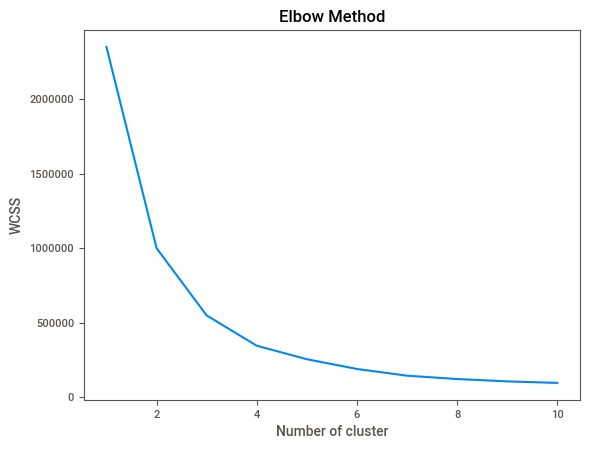

In [61]:
WCSS = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,11),WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [62]:
k=KMeans(3,random_state=42)
x['Cluster']=k.fit_predict(x)
df['Cluster']=k.fit_predict(x)

C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7192\2982002040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster']=k.fit_predict(x)
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [65]:
from sklearn.linear_model import LogisticRegression


In [66]:
model=LogisticRegression()

In [67]:
model.fit(x_train,y_train)

C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
model.score(x_test,y_test)

0.8097014925373134

In [69]:
from sklearn.cluster import DBSCAN

In [81]:
dbscan = DBSCAN(eps = 8,min_samples = 10)

In [82]:
dbscan.fit_predict(x)

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,
        0,  0,  0,  1,  0

In [83]:
dbscan = DBSCAN(eps=12,min_samples=5)

In [84]:
x['new'] = dbscan.fit_predict(x)

C:\Users\Acer\AppData\Local\Temp\ipykernel_7192\3824420641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['new'] = dbscan.fit_predict(x)


In [85]:
x[x.new == -1].shape

(24, 12)

In [86]:
df.cluster.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [4]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()

NameError: name 'test' is not defined